In [1]:
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
# 1. Download sunspot dataset
#    Load the sunspot dataset as an Array
#    http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt 
data = loadtxt("/usr/local/zeppelin/work/anom/sunspots.txt", float)

# 2. View the data as a table
data_as_frame = pd.DataFrame(data, columns=['Months', 'SunSpots'])
data_as_frame.head()

,Months,SunSpots
0,0.0,58.0
1,1.0,62.6
2,2.0,70.0
3,3.0,55.7
4,4.0,85.0


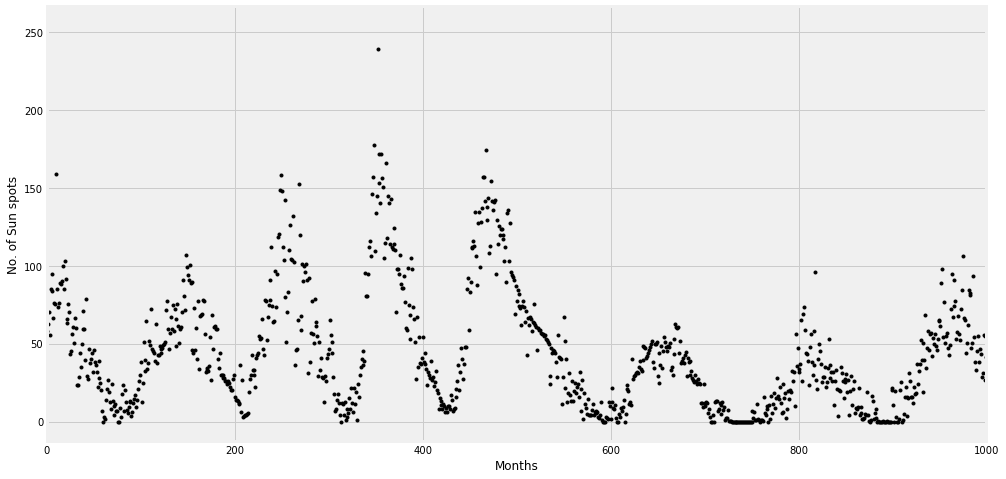

In [2]:
x = data_as_frame['Months']
y = data_as_frame['SunSpots']

def plot_results1(x,y,text_xlabel="X Axis", text_ylabel="Y Axis"):
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    plt.xlim(0, 1000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

plot_results1(x, y, text_xlabel = "Months", text_ylabel = "No. of Sun spots")

In [3]:
# 2つの1次元シーケンスの離散線形畳み込みを使用して移動平均を計算します。
#
# Args:
#            data (pandas.Series): independent variable
#           window_size (int): rolling window size
# Returns:
#            ndarray of linear convolution
#
def moving_average(data, window_size):
    """
    References:
    ------------
    [1] Wikipedia, "Convolution", http://en.wikipedia.org/wiki/Convolution.
    [2] API Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html
    """
    window = np.ones(int(window_size))/float(window_size)
    #print("window:", window)
    return np.convolve(data, window, 'same')


In [4]:
window_size=5
y_av = moving_average(y, window_size)
#print(y)
print(y_av)

[ 38.12  49.26  66.26 ...,  21.2   17.98  14.06]


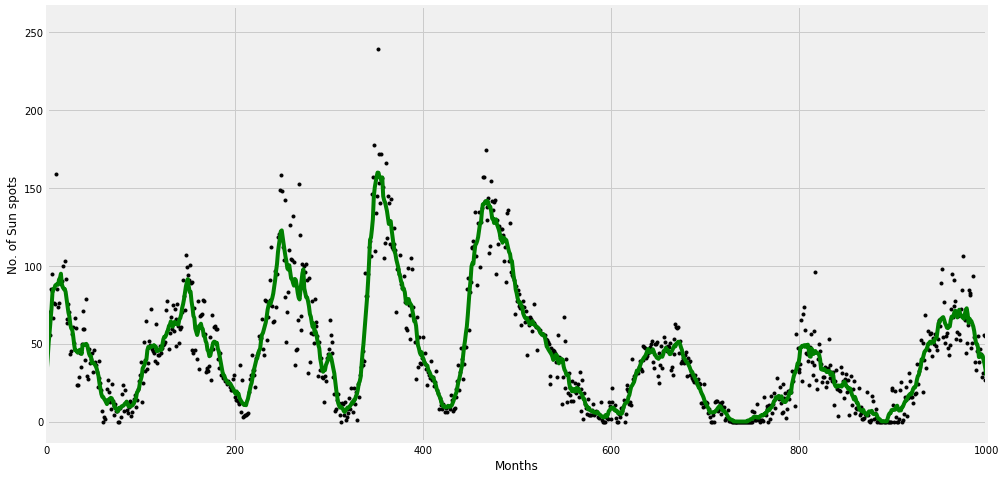

In [5]:
def plot_results2(x,y,text_xlabel="X Axis", text_ylabel="Y Axis",window_size=10):
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    plt.xlim(0, 1000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # 移動平均データのプロット
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

plot_results2(x, y, text_xlabel = "Months", text_ylabel = "No. of Sun spots",
             window_size=10)

In [6]:
window_size=10
avg = moving_average(y, window_size).tolist()
# 移動平均との残差
residual = y - avg

# 残差分布の標準偏差
std = np.std(residual)
print("残差分布の標準偏差", round(std, 3))

残差分布の標準偏差 13.342


In [7]:
# 異常値の一覧取得
#    残差分布の標準偏差を一定として
#    y > 移動平均 + (sigma*残差分布の標準偏差)) or y< 移動平均 - (sigma*残差分布の標準偏差 )
#    の場合に異常値とみなす
#
# Args:
#        y (pandas.Series): independent variable
#        window_size (int): rolling window size
#       sigma (int): value for standard deviation
# Returns:
#        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
#        containing information about the points indentified as anomalies
# 
def explain_anomalies(y, window_size, sigma=1.0):
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = round(np.std(residual), 3)

    anom = []
    for i in range(len(y)):
        y_i = y[i]
        avg_i = avg[i]
        if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std)):
            anom = np.append(anom, [int(i), y_i])

    anom = anom.reshape(int(len(anom)/2), 2)
    return {'standard_deviation': std, 'anomalies_dict': anom}


In [8]:
events = explain_anomalies(y, window_size=10, sigma=3)
dic = events['anomalies_dict']
print("異常値一覧")
print("dic list", dic)

異常値一覧
dic list [[   10.    158.6]
 [  255.     51. ]
 [  262.    132.2]
 [  264.     36. ]
 [  265.     46.2]
 [  266.     46.7]
 [  268.    152.7]
 [  269.    119.5]
 [  278.     31.1]
 [  349.    109.3]
 [  352.    238.9]
 [  818.     96.2]
 [ 1055.    206.3]
 [ 1056.    188. ]
 [ 1087.    131.2]
 [ 1088.    132.7]
 [ 1172.    107.1]
 [ 1182.     52.2]
 [ 1184.    160.9]
 [ 1185.    180.4]
 [ 1456.    176. ]
 [ 1464.     88.3]
 [ 1735.    129.2]
 [ 1882.    107.2]
 [ 1890.    103.6]
 [ 1893.     17.8]
 [ 1897.    108.2]
 [ 2023.    154.5]
 [ 2045.    111.2]
 [ 2171.    108. ]
 [ 2274.    165.3]
 [ 2380.    201.3]
 [ 2389.     86.1]
 [ 2390.     94.8]
 [ 2391.    189.7]
 [ 2398.     95.8]
 [ 2401.    182.3]
 [ 2494.    201.3]
 [ 2497.    130.3]
 [ 2503.    158. ]
 [ 2505.    253.8]
 [ 2527.    199.6]
 [ 2760.    166.6]
 [ 2789.     90.9]
 [ 2800.     82.2]
 [ 2809.     51. ]
 [ 2879.    179.2]
 [ 2885.    196.2]
 [ 2899.    200.3]
 [ 2917.    161.1]
 [ 3005.    137.7]
 [ 3018.    170.

In [9]:
# 異常値の一覧取得
#    残差分布の標準偏差を変動するものとして
#    y > 移動平均 + (sigma*残差分布の標準偏差)) or y< 移動平均 - (sigma*残差分布の標準偏差 )
#    の場合に異常値とみなす
def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
#    testing_std = pd.rolling_std(residual, window_size)
    testing_std = residual.rolling(window=window_size, center=False).std()
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan,
                   testing_std_as_df.iloc[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    std = round(std, 3)
    
    anom = []
    for i in range(len(y)):
        y_i = y[i]
        avg_i = avg[i]
        std_i = rolling_std[i]
        if (y_i > avg_i + (sigma*std_i)) | (y_i < avg_i - (sigma*std_i)):
            anom = np.append(anom, [int(i), y_i])

    anom = anom.reshape(int(len(anom)/2), 2)
    return {'stationary standard_deviation': std, 'anomalies_dict': anom}


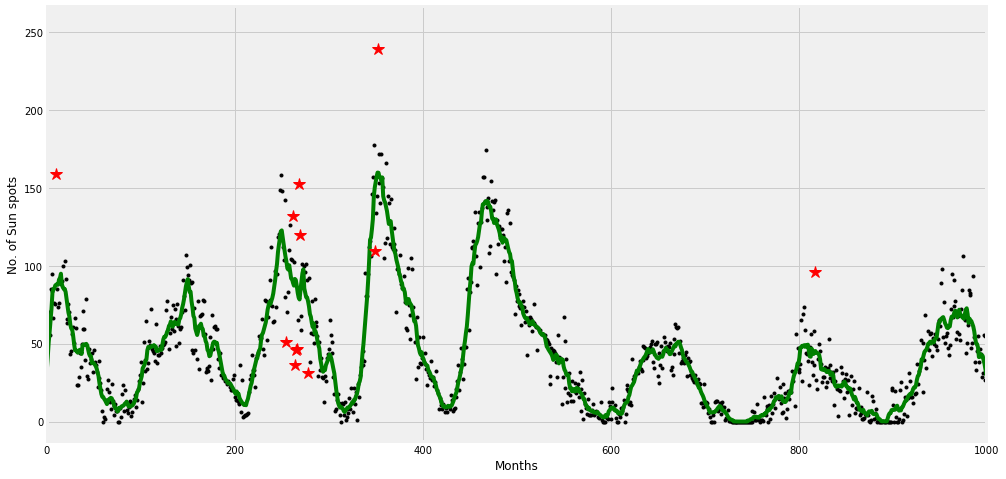

In [10]:
# データのプロット
#
#    Args:
#    -----
#        x (pandas.Series): dependent variable
#        y (pandas.Series): independent variable
#        window_size (int): rolling window size
#        sigma_value (int): value for standard deviation
#        text_xlabel (str): label for annotating the X Axis
#        text_ylabel (str): label for annotatin the Y Axis
#        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", rolling_std=False):
    plt.figure(figsize=(15, 8))
    plt.xlim(0, 1000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)
    
    # 生データのプロット
    plt.plot(x, y, "k.")
    
    # 移動平均データのプロット
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')

    # Query for the anomalies and plot the same
    events = {}
    if rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'][:,0], dtype=int,
                            count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'][:,1], dtype=float,
                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*", markersize=12)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

# 4. Lets play with the functions
x = data_as_frame['Months']
Y = data_as_frame['SunSpots']

# plot the results
rolling_std = False
plot_results(x, y=Y, window_size=10, sigma_value=3,
             text_xlabel="Months", text_ylabel="No. of Sun spots",
            rolling_std=rolling_std)

# Display the anomaly dict
#print("Information about the anomalies model:{}".format(events))
